In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import plfit

In [4]:
def plot_all(data, xlabel, ylabel, title,outfile_prefix):
    # plot pdf in a semilogx
    mlfit = plfit.plfit(data)
    alpha, xmin = mlfit._alpha, mlfit._xmin
    print('xmin= {}\talpha= {}'.format(xmin,alpha))

    data = data[data>=xmin]
    
    nums, bins = np.histogram(data,bins=1000)
    fig, ax1 = plt.subplots();
    fig.set_figwidth(15)
    fig.set_figheight(9)
    ax1.semilogx(bins[1:],nums/np.sum(nums),marker="*")
    ax1.set_ylabel(ylabel,fontsize=10);
    ax1.set_xlabel(xlabel,fontsize=10)
    ax1.set_title(title)
    ax1.spines['bottom'].set_color('black')
    ax1.spines['left'].set_color('black')
    fig.savefig('figures/{}-pdf.png'.format(outfile_prefix),transparent=True)
    fig.show()
    
    # plot the power-law fit
    nums, bins = np.histogram(data,bins=1000)
    x = bins[1:]
    y = nums
    fig, ax2 = plt.subplots();
    fig.set_figwidth(15)
    fig.set_figheight(9)

    z=np.arange(1, len(x)+1) #start at 1, to avoid error from log(0)
    logA = np.log(z) #no need for list comprehension since all z values >= 1
    logB = np.log(y)
    logA[logA == -np.inf]=0
    logB[logB == -np.inf]=0
    offset = logB[0] + alpha*logA[0]
    m, c = np.polyfit(logA, logB, 1) # fit log(y) = m*log(x) + c

    ax2.loglog(z, y, color = 'r',label='original')
    ax2.loglog(np.exp(logA), np.exp(m*logA + c), color ='g',label=r'OLS fit, $\alpha=${}'.format(np.round(m,2)))
    ax2.loglog(np.exp(logA), np.exp(-alpha*logA+offset), color ='b',label=r'Power-law fit, $\alpha=${}'.format(-np.round(alpha,2)))
    # TODO: use zoom for better plot
    ax2.set_ylabel(ylabel,fontsize=10)
    ax2.set_xlabel(xlabel,fontsize=10)
    ax2.set_title(title)
    ax2.spines['bottom'].set_color('black')
    ax2.spines['left'].set_color('black')
    ax2.legend(fancybox=True, framealpha=0.5,prop={'size': 15})
    fig.savefig('figures/{}-powerlawfit.png'.format(outfile_prefix),transparent=True)
    fig.show()
    
    # plot xmin vs ks
    ax3 = mlfit.xminvsks()
    ax3.get_figure().savefig('figures/{}-xminvsks.png'.format(outfile_prefix),transparent=True)
    
    # plot alpha vs ks
    ax4 = mlfit.alphavsks()
    ax4.get_figure().savefig('figures/{}-alphavsks.png'.format(outfile_prefix),transparent=True)
    
    # plot cdf fit
    mlfit.plotcdf(xlabel=xlabel,ylabel=ylabel,outfile='figures/{}-cdf.png'.format(outfile_prefix))

# US City Dataset

In [3]:
dt = pd.read_csv('/Users/yaserkeneshloo/Downloads/sub-est2016_all.csv',sep=',',header=0,error_bad_lines=False, encoding = "ISO-8859-1")
#dt.columns = ['population']
data = dt['POPESTIMATE2010'].astype(int).values
cities = dt['NAME'].values

xmin= 44963	alpha= 2.111657390482754


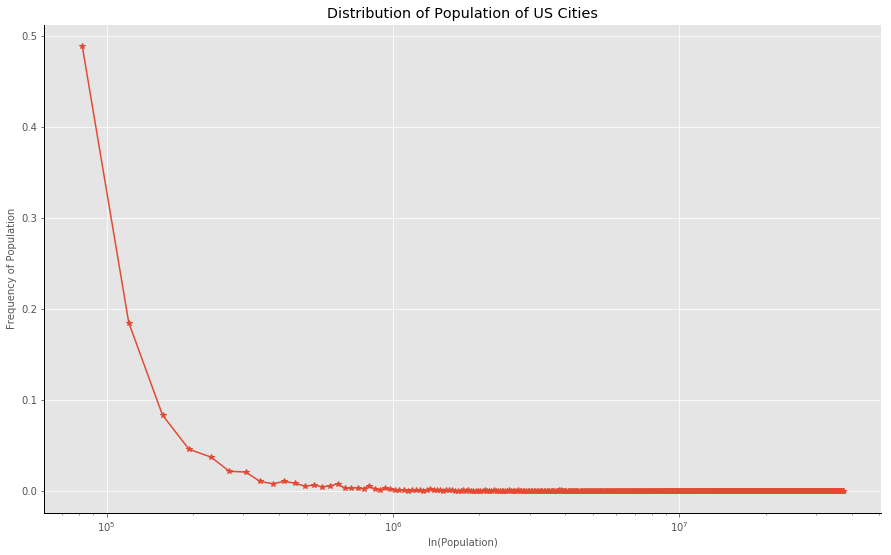

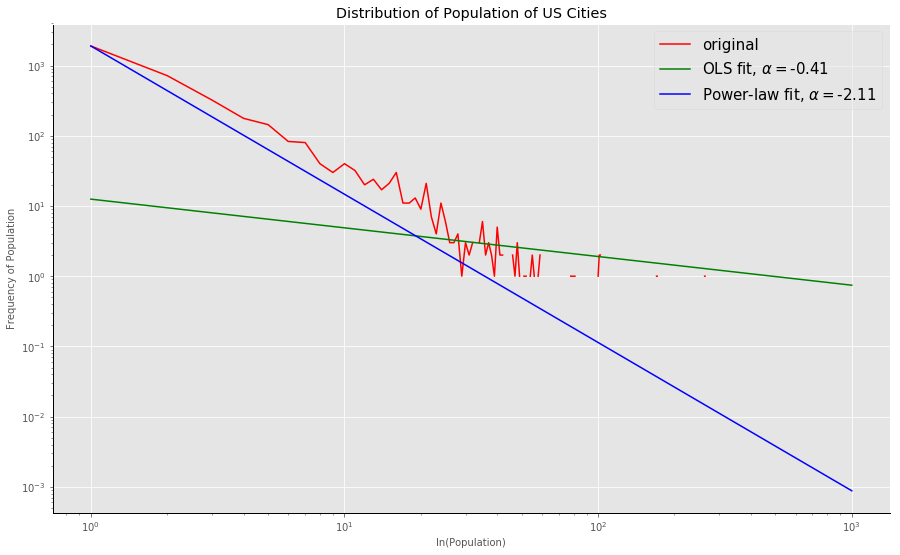

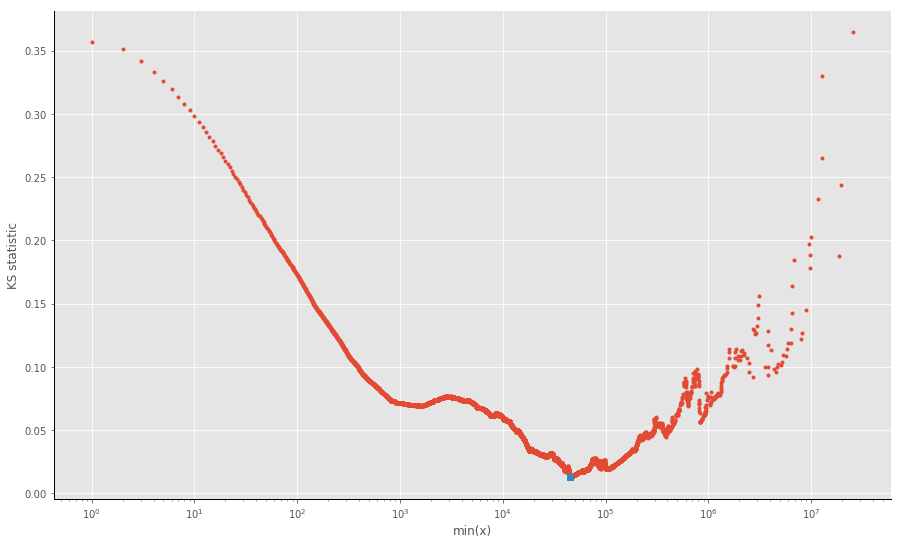

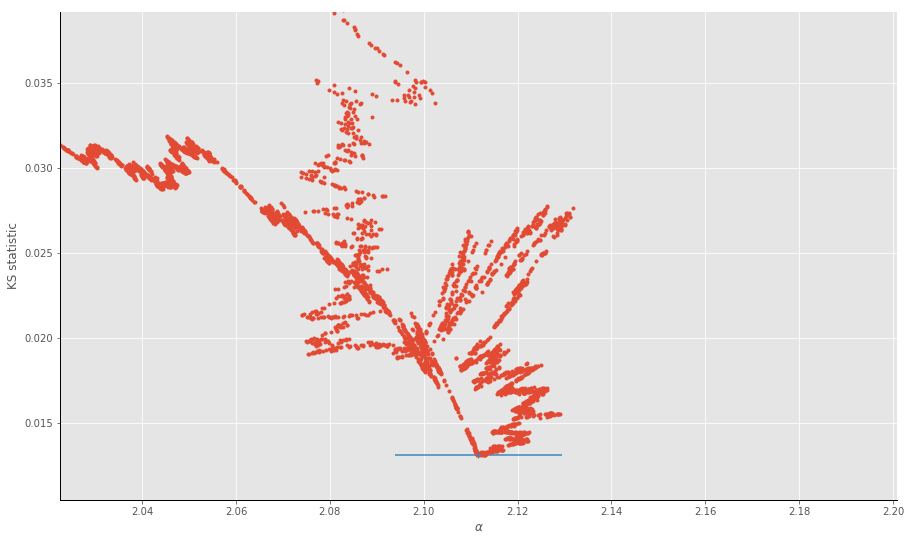

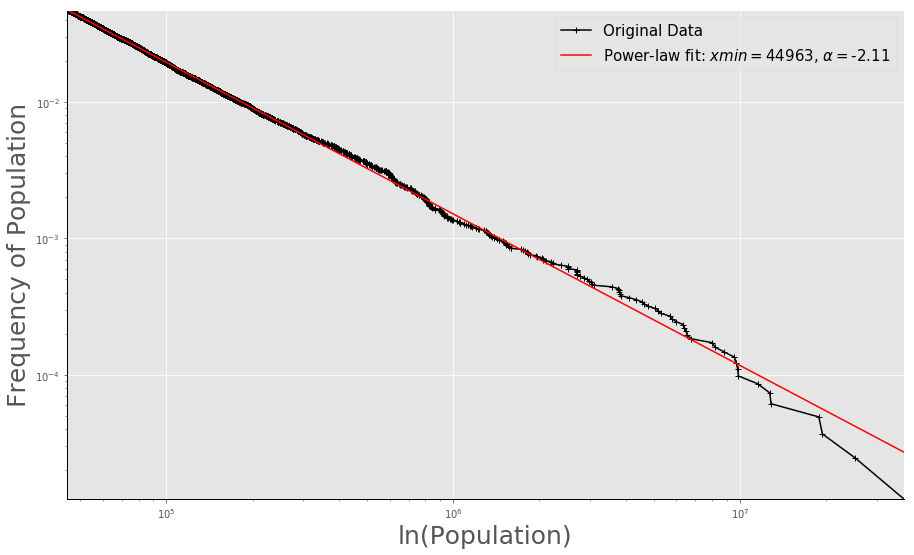

In [5]:
plot_all(data, 'ln(Population)','Frequency of Population', 'Distribution of Population of US Cities', 'uscities')

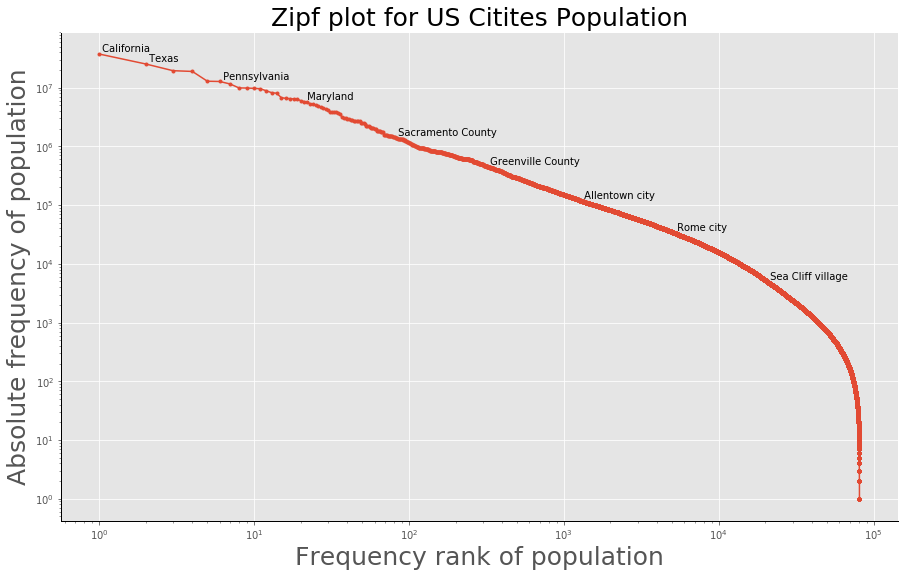

In [56]:
from pylab import *
ranks = np.arange(1, len(data)+1)
indices = np.argsort(-data)
frequencies = data[indices]
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(9)
ax.loglog(ranks, frequencies, marker=".")
ax.set_title("Zipf plot for US Citites Population",fontsize=25)
ax.set_xlabel("Frequency rank of population",fontsize=25)
ax.set_ylabel("Absolute frequency of population",fontsize=25)
for n in list(np.logspace(-0.5, np.log10(len(data)), 10).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + cities[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
fig.savefig('figures/uscities-zipf.png',transparent=True)
fig.show()

# NYC Taxi Dataset

In [5]:
dt = pd.read_csv('/Users/yaserkeneshloo/Dropbox/urbcomp-scripts/datasets/nyctaxi/green_tripdata_2017-06.csv.gz',sep=',',header=0)
dt = dt[np.isfinite(dt['trip_distance'])]
tripdistance = dt['trip_distance'].values

xmin= 33.26	alpha= 3.9558820652320064


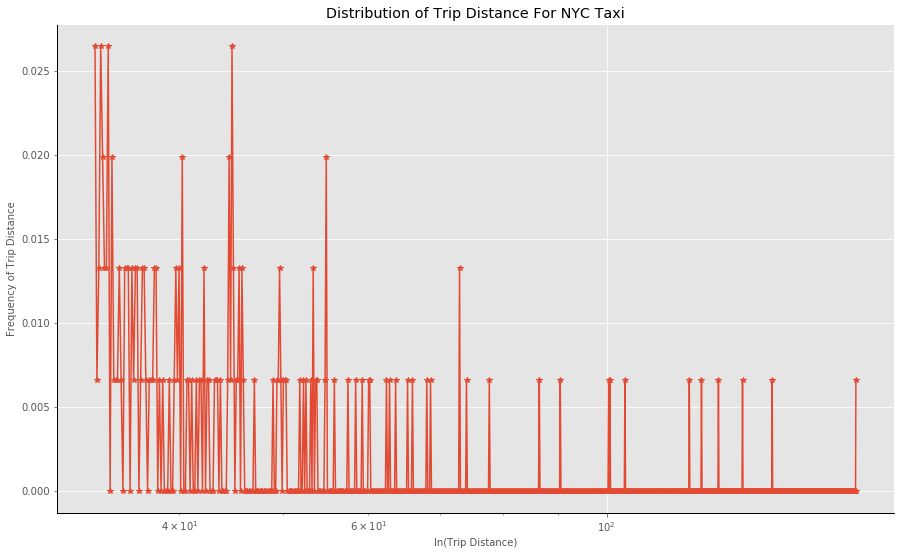

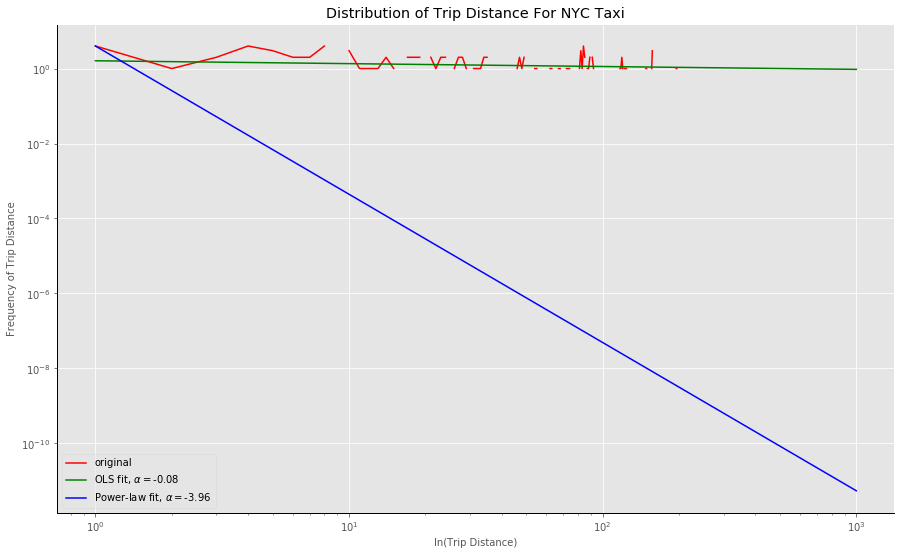

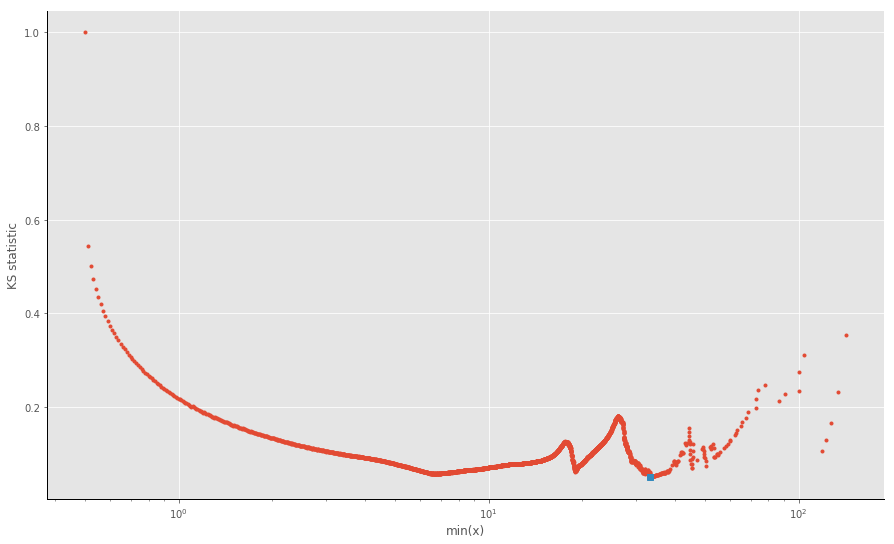

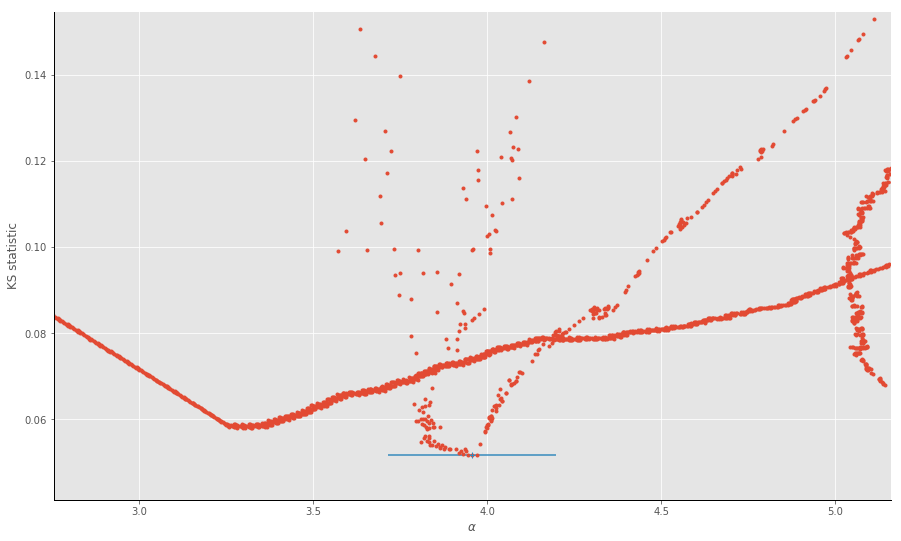

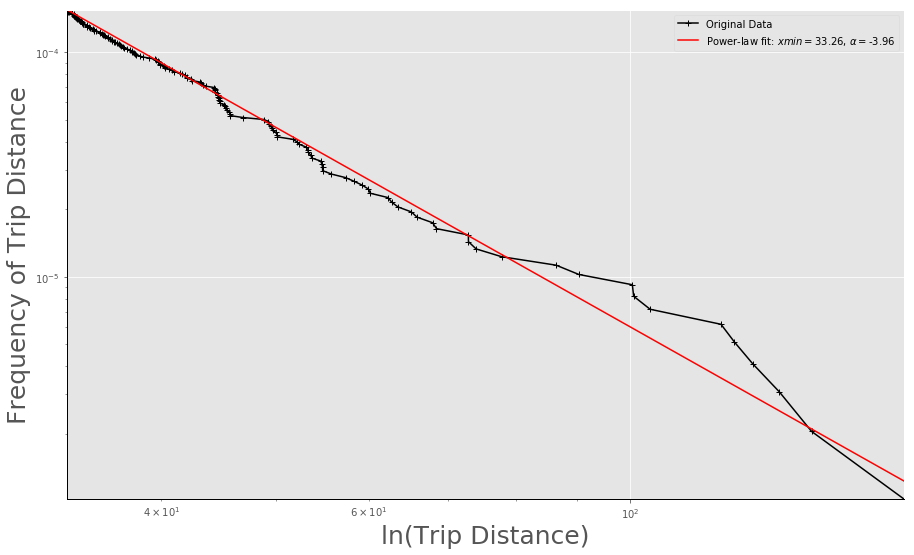

In [6]:
plot_all(tripdistance, 'ln(Trip Distance)', 'Frequency of Trip Distance', 'Distribution of Trip Distance For NYC Taxi', 'tripdistance')

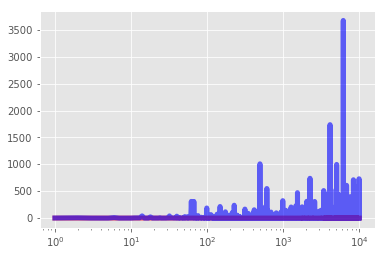

In [17]:
import scipy.stats as ss
alpha = 2.5
mu = 0.3
sigma = 2
lambda_ = 0.125
x = np.arange(10000)
lognormal = np.random.lognormal(mean=0.3,sigma=2,size=10000)
powerlaw = ss.powerlaw.rvs(alpha, size=10000)

fig, ax = plt.subplots()
ax.semilogx(x, powerlaw, 'r-', lw=5, alpha=0.6, label='powerlaw pdf')
ax.semilogx(x, lognormal, 'b-', lw=5, alpha=0.6, label='lognormal pdf')
fig.show()